In [1]:
from collections import defaultdict
from graphapplication import GraphStateDistribution
from squidasm.run.stack.config import StackNetworkConfig
from squidasm.run.stack.run import run
from squidasm.sim.stack.common import LogManager
from yaml_to_nx import yaml_to_nx, visualize_graph, visualize_graph_with_overlay
from networkx.generators import star_graph

# Set up logging
LogManager.set_log_level("INFO")
logger = LogManager.get_stack_logger()
logger.handlers = []
LogManager.log_to_file("logs/info.log")

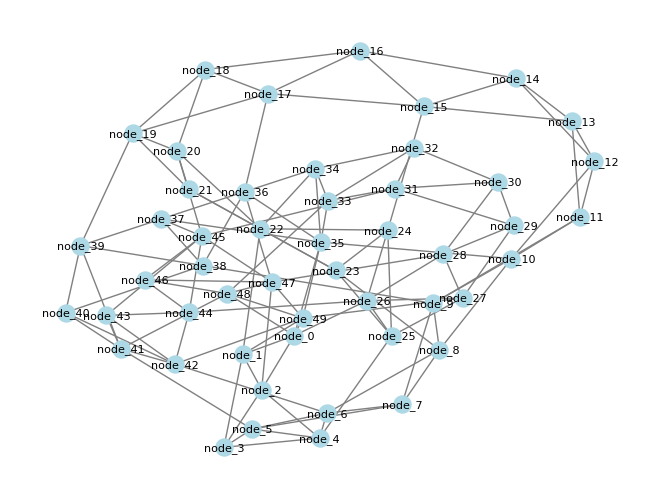

In [7]:
#Examples from network_configs (check gen_network_yaml.py at network_configs to create a custom network configuration)
#smallworldnetwork
#network_config_ideal
#network_config_noisy
#smallworld_config_ideal
#smallworld_config_noisy
#largesmallworld_config_ideal
#largesmallworld_config_noisy

# Setup network configuration
# Import yaml file, pass it to networkx object and visualize
cfg = StackNetworkConfig.from_file("network_configs/largesmallworld_config_ideal.yaml")
G = yaml_to_nx("network_configs/largesmallworld_config_ideal.yaml")
visualize_graph(G,node_size=150,font_size=8)

In [8]:
# Setup the rest of the simulation:

# Extract the list of node names
nodes = [stack.name for stack in cfg.stacks]
# Generate a list of the peers for each node, which we need to pass to each node's program
peers = defaultdict(set)
for link in cfg.links:
    peers[link.stack1].add(link.stack2)
    peers[link.stack2].add(link.stack1)
for node in peers:
    peers[node] = sorted(peers[node], key=lambda x: int(x.split('_')[1]))

# Example star graph state request
center = "node_41"
leaves = ["node_10", "node_26", "node_34", "node_5","node_31", "node_4", "node_11", "node_15", "node_17"]

# Setup the programs for each node. We also 
programs = {
    node: GraphStateDistribution(node_name=node, peer_names=peers[node], graph=G, center=center, leaves=leaves)
    for node in nodes
}

# Run simulation
run(config=cfg, programs=programs, num_times=1) # Currently no information on the simulation results is collected

# Note that 

0.0us: [CENTER node_1] Step 0: Integrating first leaf node_0 into star graph.
0.0us: [LEAF node_0] Step 0: Integrating first leaf node_0 into star graph.
1000.0us: [LEAF node_0] Step 0 complete: Established an EPR pair with center node_1.
1000.0us: [CENTER node_1] Step 0 complete: Generated EPR pair with leaf node_0. ----------------------
1000.0us: [CENTER node_1] Step 1: Integrating second leaf node_3 into star graph.
1000.0us: [LEAF node_3] Step 1: Integrating second leaf node_3 into star graph.
2000.0us: [LEAF node_3] Step 1: Established an EPR pair with center node_1.
2000.0us: [CENTER node_1] Step 1: Measured qubit (result 0). Sending measurement outcome to leaf node_3 for correction.
2000.0us: [CENTER node_1] Step 1 complete: Merged second leaf. Currently forming a 3-node graph. ----------------------
2000.0us: [LEAF node_3] Step 1: EPR pair established with node_1. Received measurement outcome '0' from center.
2000.0us: [LEAF node_3] Step 1: Measurement is 0. Applies H gate to 

[[{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}]]

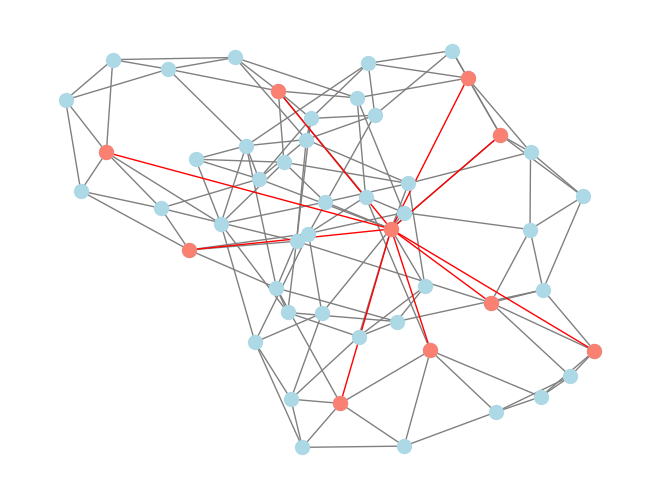

In [9]:
# We generate a nx star graph object for visualization
star_nodes = ["node_41","node_10", "node_26", "node_34", "node_5","node_31", "node_4", "node_11", "node_15", "node_17"]
star = star_graph(star_nodes)

visualize_graph_with_overlay(G,star,show_node_labels=False,node_size=100)

In [ ]:
# Import yaml file, pass it to networkx object and visualize
cfg = StackNetworkConfig.from_file("network_configs/largesmallworld_config_noisy.yaml")
G = yaml_to_nx("network_configs/largesmallworld_config_noisy.yaml")

# Extract the list of node names
nodes = [stack.name for stack in cfg.stacks]
# Generate a list of the peers for each node, which we need to pass to each node's program
peers = defaultdict(set)
for link in cfg.links:
    peers[link.stack1].add(link.stack2)
    peers[link.stack2].add(link.stack1)
for node in peers:
    peers[node] = sorted(peers[node], key=lambda x: int(x.split('_')[1]))

# Example star graph state request
center = "node_41"
leaves = ["node_10", "node_26", "node_34", "node_5","node_31", "node_4", "node_11", "node_15", "node_17"]

# Setup the programs for each node. We also 
programs = {
    node: GraphStateDistribution(node_name=node, peer_names=peers[node], graph=G, center=center, leaves=leaves)
    for node in nodes
}

# Run simulation
run(config=cfg, programs=programs, num_times=1) # Currently no information on the simulation results is collected

# A simple look at a simulation with noisy conditions results in a run time of over 10s, which is way beyond current coherence times, 
# so the current protocol remains completely unviable for a realistic scenario in similar sized networks

0.0us: [CENTER node_1] Step 0: Integrating first leaf node_0 into star graph.
0.0us: [LEAF node_0] Step 0: Integrating first leaf node_0 into star graph.
250000.0us: [LEAF node_0] Step 0 complete: Established an EPR pair with center node_1.
250000.0us: [CENTER node_1] Step 0 complete: Generated EPR pair with leaf node_0. ----------------------
350000.0us: [CENTER node_1] Step 1: Integrating second leaf node_3 into star graph.
400000.0us: [LEAF node_3] Step 1: Integrating second leaf node_3 into star graph.
550000.0us: [LEAF node_3] Step 1: Established an EPR pair with center node_1.
570000.0us: [CENTER node_1] Step 1: Measured qubit (result 0). Sending measurement outcome to leaf node_3 for correction.
570000.0us: [CENTER node_1] Step 1 complete: Merged second leaf. Currently forming a 3-node graph. ----------------------
620000.0us: [LEAF node_3] Step 1: EPR pair established with node_1. Received measurement outcome '0' from center.
620000.0us: [LEAF node_3] Step 1: Measurement is 0. 

[[{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}],
 [{}]]